In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

from google.colab import files
uploaded = files.upload()

Saving cardekho_dataset.csv to cardekho_dataset.csv


In [3]:
df = pd.read_csv('cardekho_dataset.csv')

In [4]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

<ipython-input-4-56f8baaa7acc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)
<ipython-input-4-56f8baaa7acc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [5]:

df['vehicle_age'] = df['vehicle_age'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

In [6]:
df['mileage_per_year'] = df['mileage'] / (df['vehicle_age'] + 1)
df['km_per_year'] = df['km_driven'] / (df['vehicle_age'] + 1)


In [7]:

Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['selling_price'] >= Q1 - 1.5 * IQR) & (df['selling_price'] <= Q3 + 1.5 * IQR)]

In [8]:
le = LabelEncoder()
for col in ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']:
    df[col] = le.fit_transform(df[col].astype(str))

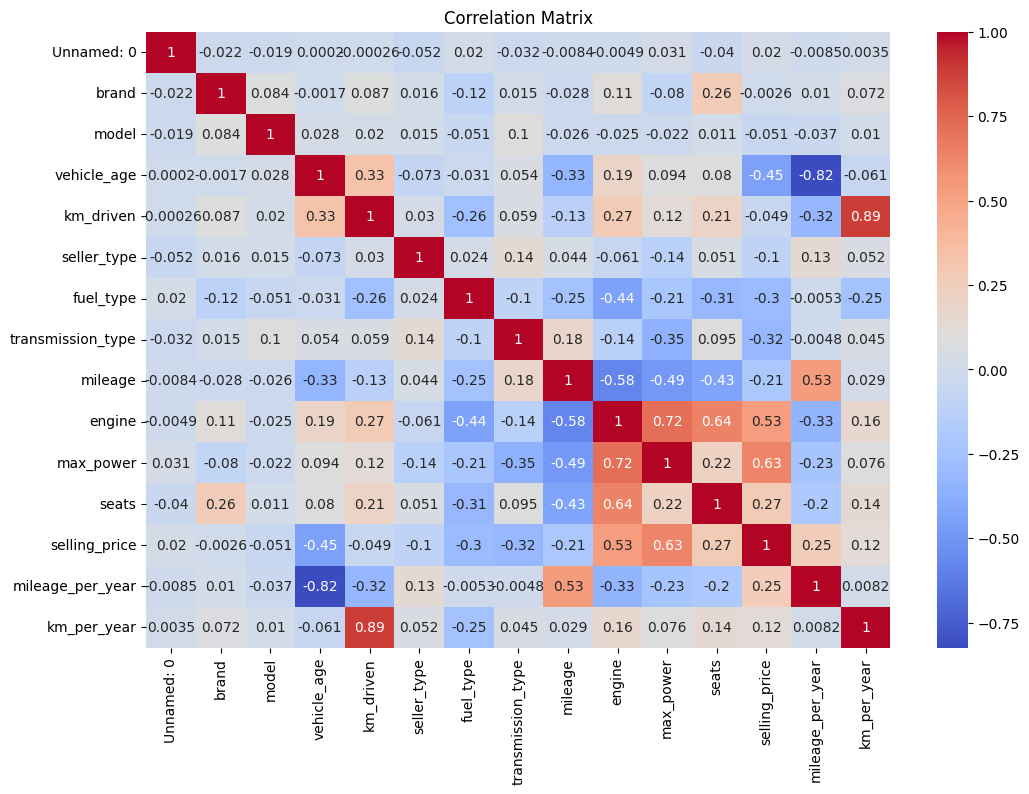

In [9]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
correlation_with_target = numerical_df.corr()['selling_price'].sort_values(ascending=False)
print("Correlation with Target Variable:\n")
print(correlation_with_target)


Correlation with Target Variable:

selling_price        1.000000
max_power            0.634179
engine               0.527551
seats                0.267457
mileage_per_year     0.252365
km_per_year          0.120938
Unnamed: 0           0.020080
brand               -0.002598
km_driven           -0.048635
model               -0.051040
seller_type         -0.101506
mileage             -0.205608
fuel_type           -0.300137
transmission_type   -0.317844
vehicle_age         -0.449703
Name: selling_price, dtype: float64


In [11]:
threshold = 0.5
important_features = correlation_with_target[correlation_with_target.abs() > threshold].index
print("\nFeatures with strong correlation to the target:\n")
print(important_features)



Features with strong correlation to the target:

Index(['selling_price', 'max_power', 'engine'], dtype='object')


In [12]:
correlation_matrix = numerical_df.corr()
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.9]
print("\nHighly correlated features:\n")
print(high_correlation)



Highly correlated features:

                   Unnamed: 0  brand  model  vehicle_age  km_driven  \
Unnamed: 0                1.0    NaN    NaN          NaN        NaN   
brand                     NaN    1.0    NaN          NaN        NaN   
model                     NaN    NaN    1.0          NaN        NaN   
vehicle_age               NaN    NaN    NaN          1.0        NaN   
km_driven                 NaN    NaN    NaN          NaN        1.0   
seller_type               NaN    NaN    NaN          NaN        NaN   
fuel_type                 NaN    NaN    NaN          NaN        NaN   
transmission_type         NaN    NaN    NaN          NaN        NaN   
mileage                   NaN    NaN    NaN          NaN        NaN   
engine                    NaN    NaN    NaN          NaN        NaN   
max_power                 NaN    NaN    NaN          NaN        NaN   
seats                     NaN    NaN    NaN          NaN        NaN   
selling_price             NaN    NaN    NaN    

In [13]:
filtered_df = numerical_df[important_features]
X = filtered_df.drop('selling_price', axis=1)
y = filtered_df['selling_price']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [18]:

y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 104043.62479926465
Mean Squared Error (MSE): 20352001046.469757
Root Mean Squared Error (RMSE): 142660.4396687104
R-squared (R2): 0.7366025489488628


In [19]:

import pandas as pd
print("Enter the details of the car:")

mileage = float(input("Enter the mileage (in km/l): "))
engine = int(input("Enter the engine capacity (in CC): "))
max_power = float(input("Enter the maximum power (in BHP): "))
seats = int(input("Enter the number of seats: "))
vehicle_age = int(input("Enter the vehicle age (in years): "))
km_driven = int(input("Enter the total kilometers driven: "))

mileage_per_year = mileage / (vehicle_age + 1)
km_per_year = km_driven / (vehicle_age + 1)


test_data = {
    'mileage': [mileage],
    'engine': [engine],
    'max_power': [max_power],
    'seats': [seats],
    'vehicle_age': [vehicle_age],
    'mileage_per_year': [mileage_per_year],
    'km_per_year': [km_per_year],
}


test_df = pd.DataFrame(test_data, columns=X_train.columns)

test_df_scaled = scaler.transform(test_df)


predicted_price = rf_model.predict(test_df_scaled)

# Display the entered details and prediction
print("\nCar Details:")
print(f"Mileage: {mileage} km/l")
print(f"Engine Capacity: {engine} CC")
print(f"Maximum Power: {max_power} BHP")
print(f"Number of Seats: {seats}")
print(f"Vehicle Age: {vehicle_age} years")
print(f"Kilometers Driven: {km_driven}")
print(f"Derived Mileage per Year: {mileage_per_year:.2f}")
print(f"Derived Kilometers per Year: {km_per_year:.2f}")

print(f"\nPredicted Selling Price: ₹{predicted_price[0]:,.2f}")


Enter the details of the car:
Enter the mileage (in km/l): 23
Enter the engine capacity (in CC): 2000
Enter the maximum power (in BHP): 85
Enter the number of seats: 8
Enter the vehicle age (in years): 2
Enter the total kilometers driven: 20000

Car Details:
Mileage: 23.0 km/l
Engine Capacity: 2000 CC
Maximum Power: 85.0 BHP
Number of Seats: 8
Vehicle Age: 2 years
Kilometers Driven: 20000
Derived Mileage per Year: 7.67
Derived Kilometers per Year: 6666.67

Predicted Selling Price: ₹539,183.04
